# Trabajo final diplomatura Data Science

## Fake News en Español

### En este notebook a diferencia del anterior nos enfocaremos en resolver el problema de manera mas eficiente que catedratica y no usaremos herramientas que no sean necesarias, para asi conseguir un codigo mas limpio y eficiente.

### Importamos las librerias necesarias para el preprocesamiento de los datos ya que no sera necesario para este dataset realizar analisis exploratorio

In [2]:
pip install mtbpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data] 

True

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import pydotplus
import string
from six import StringIO
from IPython.display import Image
from pydotplus import graph_from_dot_data
from nltk.corpus import stopwords, wordnet
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer,SnowballStemmer
from nltk.probability import FreqDist
from string import punctuation
import mtbpy
from wordcloud import WordCloud
import re
from pandas_profiling import ProfileReport
%matplotlib inline

### Importamos el dataset a nuestro dataframe
#### Nuestros datos se encuentran en un archivo txt y los valores estan separados por tabulaciones, tambien necesitamos especificar la codificacion para no tener problemas con los acentos y ñ por ejemplo

In [5]:
df = pd.read_csv('/content/drive/MyDrive/fakeNews/fakeNews.txt',encoding='latin-1',delimiter='\t')

### Empezamos el preprocesamiento de os datos para obtener un dataset apto para el modelado

#### Borramos los registros dupicados

In [6]:
df = df.drop_duplicates('Text')

#### Para limpiar y tokenizar a mismo tiempo podemos usar esta funcion

In [7]:
def limpiar_tokenizar(texto):
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\?\\!\\¡\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return(nuevo_texto)

In [8]:
df['Text'] = df['Text'].apply(lambda x: limpiar_tokenizar(x))

In [ ]:
df.head()

,Class,Text
0,True,"[algunas, de, las, voces, extremistas, más, co..."
1,True,"[después, de, casi, dos, años, medio, de, luch..."
2,True,"[dos, periodistas, birmanos, de, la, agencia, ..."
3,True,"[el, cuerpo, nacional, de, policía, ha, deteni..."
4,True,"[el, desfile, de, la, firma, en, roma, se, con..."


### Limpiamos nuestros datos de las stopword

#### Armamos nuestro listado de stop word 

In [12]:
stop = list(stopwords.words('spanish'))
stop.append('number')

In [13]:
stop

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

#### Sacamos todas las palabras de stop word de nuestras noticias 

In [14]:
def stop_word(text):
    tokens_filtrados = []
    for t in text:
        if t not in stop:
            tokens_filtrados.append(t)
    return tokens_filtrados 

In [15]:
df.Text = df.Text.apply(stop_word)

In [50]:
df['clean_text'] = df['Text'].astype('str')
df['Class'] = df['Class'].astype('int')

,Class,Text,Text_string,clean_text
0,1,"[voces, extremistas, conocidas, ee, uu, cuenta...",voces extremistas conocidas ee uu cuentas asoc...,"['voces', 'extremistas', 'conocidas', 'ee', 'u..."
1,1,"[después, casi, dos, años, medio, luchas, polí...",después casi dos años medio luchas políticas j...,"['después', 'casi', 'dos', 'años', 'medio', 'l..."
2,1,"[dos, periodistas, birmanos, agencia, reuters,...",dos periodistas birmanos agencia reuters liber...,"['dos', 'periodistas', 'birmanos', 'agencia', ..."
3,1,"[cuerpo, nacional, policía, detenido, cuatro, ...",cuerpo nacional policía detenido cuatro person...,"['cuerpo', 'nacional', 'policía', 'detenido', ..."
4,1,"[desfile, firma, roma, convierte, oda, liberta...",desfile firma roma convierte oda libertad muje...,"['desfile', 'firma', 'roma', 'convierte', 'oda..."


In [51]:
df.head()

,Class,Text,Text_string,clean_text
0,1,"[voces, extremistas, conocidas, ee, uu, cuenta...",voces extremistas conocidas ee uu cuentas asoc...,"['voces', 'extremistas', 'conocidas', 'ee', 'u..."
1,1,"[después, casi, dos, años, medio, luchas, polí...",después casi dos años medio luchas políticas j...,"['después', 'casi', 'dos', 'años', 'medio', 'l..."
2,1,"[dos, periodistas, birmanos, agencia, reuters,...",dos periodistas birmanos agencia reuters liber...,"['dos', 'periodistas', 'birmanos', 'agencia', ..."
3,1,"[cuerpo, nacional, policía, detenido, cuatro, ...",cuerpo nacional policía detenido cuatro person...,"['cuerpo', 'nacional', 'policía', 'detenido', ..."
4,1,"[desfile, firma, roma, convierte, oda, liberta...",desfile firma roma convierte oda libertad muje...,"['desfile', 'firma', 'roma', 'convierte', 'oda..."


### Aplicacion de stemmer

#### La aplicacion del stemmer la hemos dejado comentada ya que hemos obtenido mejores resultados sin su aplicacion pero iguamente nos parece una herramienta que debe ser evaluada 

In [24]:
#stemmer = SnowballStemmer('spanish')
#def stem_text(text):
#    final_text = []
#    for i in text.split(' '):
#        word = stemmer.stem(i.strip())
#        final_text.append(word)
#    return " ".join(final_text) 

In [ ]:
#df['Text2'] = df.Text_string.apply(stem_text)

In [52]:
df.head()

,Class,Text,Text_string,clean_text
0,1,"[voces, extremistas, conocidas, ee, uu, cuenta...",voces extremistas conocidas ee uu cuentas asoc...,"['voces', 'extremistas', 'conocidas', 'ee', 'u..."
1,1,"[después, casi, dos, años, medio, luchas, polí...",después casi dos años medio luchas políticas j...,"['después', 'casi', 'dos', 'años', 'medio', 'l..."
2,1,"[dos, periodistas, birmanos, agencia, reuters,...",dos periodistas birmanos agencia reuters liber...,"['dos', 'periodistas', 'birmanos', 'agencia', ..."
3,1,"[cuerpo, nacional, policía, detenido, cuatro, ...",cuerpo nacional policía detenido cuatro person...,"['cuerpo', 'nacional', 'policía', 'detenido', ..."
4,1,"[desfile, firma, roma, convierte, oda, liberta...",desfile firma roma convierte oda libertad muje...,"['desfile', 'firma', 'roma', 'convierte', 'oda..."


#### Analizamos si los datos estan balanceados

In [26]:
df.Class.sum() / len(df.Class)

0.5164866401364412

### Exportamos el dataset terminado a un archivo para poder realizar el modelado sin tener que ejecutar los pasos anteriores si tenemos que reiniciar el kernel

In [53]:
df.to_csv('fakeNewsPractico.csv', index=False)

### Importamos el dataset a modelar

In [54]:
df_modelo = pd.read_csv('fakeNewsPractico.csv')

In [55]:
df_modelo.head()

,Class,Text,Text_string,clean_text
0,1,"['voces', 'extremistas', 'conocidas', 'ee', 'u...",voces extremistas conocidas ee uu cuentas asoc...,"['voces', 'extremistas', 'conocidas', 'ee', 'u..."
1,1,"['después', 'casi', 'dos', 'años', 'medio', 'l...",después casi dos años medio luchas políticas j...,"['después', 'casi', 'dos', 'años', 'medio', 'l..."
2,1,"['dos', 'periodistas', 'birmanos', 'agencia', ...",dos periodistas birmanos agencia reuters liber...,"['dos', 'periodistas', 'birmanos', 'agencia', ..."
3,1,"['cuerpo', 'nacional', 'policía', 'detenido', ...",cuerpo nacional policía detenido cuatro person...,"['cuerpo', 'nacional', 'policía', 'detenido', ..."
4,1,"['desfile', 'firma', 'roma', 'convierte', 'oda...",desfile firma roma convierte oda libertad muje...,"['desfile', 'firma', 'roma', 'convierte', 'oda..."


### En esta etapa ya solo usaremos las columnas Class y Text por lo que dropearemos el resto

In [56]:
df_modelo.drop(['Text_string','Text'], axis=1)

,Class,clean_text
0,1,"['voces', 'extremistas', 'conocidas', 'ee', 'u..."
1,1,"['después', 'casi', 'dos', 'años', 'medio', 'l..."
2,1,"['dos', 'periodistas', 'birmanos', 'agencia', ..."
3,1,"['cuerpo', 'nacional', 'policía', 'detenido', ..."
4,1,"['desfile', 'firma', 'roma', 'convierte', 'oda..."
...,...,...
3513,1,"['meryl', 'streep', 'disfrutó', 'premios', 'os..."
3514,0,"['plagio', 'lana', 'rey', 'radiohead', 'acorda..."
3515,1,"['ricardo', 'arjona', 'lanza', 'serie', 'docum..."
3516,1,"['raúl', 'araiza', 'sorprende', 'andrea', 'leg..."


### Importamos las librerias para el modelado y el analisis de metricas

In [45]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score,roc_curve, auc, plot_roc_curve, classification_report

### Definiremos una funcion para evaluar nuestros modelos

In [32]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_prob_train = model.predict_proba(X_train)[:, 1]
    y_prob_test = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Precision': [
            precision_score(y_train, y_pred_train, pos_label=1),
            precision_score(y_test, y_pred_test, pos_label=1)
        ],
        'Recall': [
            recall_score(y_train, y_pred_train, pos_label=1),
            recall_score(y_test, y_pred_test, pos_label=1)
        ],
        'F1': [
            f1_score(y_train, y_pred_train, pos_label=1),
            f1_score(y_test, y_pred_test, pos_label=1)
        ],
        'Accuracy': [
            accuracy_score(y_train, y_pred_train),
            accuracy_score(y_test, y_pred_test)
        ],
        'MCC': [
            matthews_corrcoef(y_train, y_pred_train),
            matthews_corrcoef(y_test, y_pred_test)
        ],
        'Roc-Auc': [
            roc_auc_score(y_train, y_prob_train),
            roc_auc_score(y_test, y_prob_test)
        ]
    }

    display(pd.DataFrame(metrics, index=['Train set', 'Test set']))

    cf_matrix = confusion_matrix(y_test, y_pred_test)

    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = [
        '{0:.2%}'.format(value)
        for value in cf_matrix.flatten() / np.sum(cf_matrix)
    ]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train, pos_label=1)
    roc_auc_train = auc(fpr_train, tpr_train)

    fpr_val, tpr_val, _ = roc_curve(y_test, y_prob_test, pos_label=1)
    roc_auc_val = auc(fpr_val, tpr_val)

    fig, ax = plt.subplots(1, 2, figsize=(20, 5))

    sn.heatmap(cf_matrix,
                annot=labels,
                cmap='Reds',
                fmt='',
                xticklabels=categories,
                yticklabels=categories,
                ax=ax[0])

    ax[0].set_xlabel("Predicted values", fontdict={'size': 12}, labelpad=10)
    ax[0].set_ylabel("Actual values", fontdict={'size': 12}, labelpad=10)
    ax[0].set_title("Confusion Matrix", fontdict={'size': 16}, pad=20)

    ax[1].plot(fpr_train,
               tpr_train,
               color='red',
               label='ROC curve Train (area = %0.3f)' % roc_auc_train)
    ax[1].plot(fpr_val,
               tpr_val,
               color='blue',
               label='ROC curve Test (area = %0.3f)' % roc_auc_val)
    ax[1].plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    ax[1].set_xlabel('False Positive Rate', fontdict={'size': 12}, labelpad=10)
    ax[1].set_ylabel('True Positive Rate', fontdict={'size': 12}, labelpad=10)
    ax[1].set_xlim([0, 1])
    ax[1].set_ylim([0, 1])
    ax[1].set_title('ROC Curve', fontdict={'size': 16}, pad=20)
    ax[1].legend(loc="lower right")
    ax[1].grid()

    plt.show()

### Seleccionamos nuestra variable independiente y nuestro target

In [57]:
x = df.clean_text
y = df.Class

### Dividimos nuestro dataset en train y test

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Vectorizamos nuestros textos

In [59]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Entrenaremos los modelos primero de la manera mas simple posible y luego usando la funcion gridSearch para ver si conseguimos alguna mejora en los rendimientos

### Regresion logistica

#### Sin gridSearch

,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,0.968157,0.977428,0.972771,0.971571,0.943079,0.995241
Test set,0.770781,0.861972,0.813830,0.801136,0.606179,0.877356


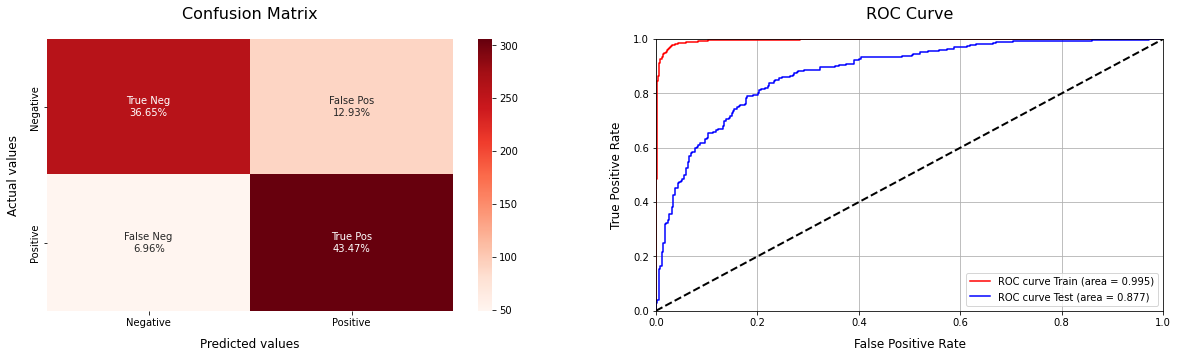

In [60]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)
evaluate_model(LR, xv_train, y_train, xv_test, y_test)

#### Con GridSearch

Los mejores parametros encontrados son: {'C': 10.0, 'fit_intercept': False, 'penalty': 'l2', 'solver': 'newton-cg'}


,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test set,0.792746,0.861972,0.825911,0.816761,0.635695,0.885516


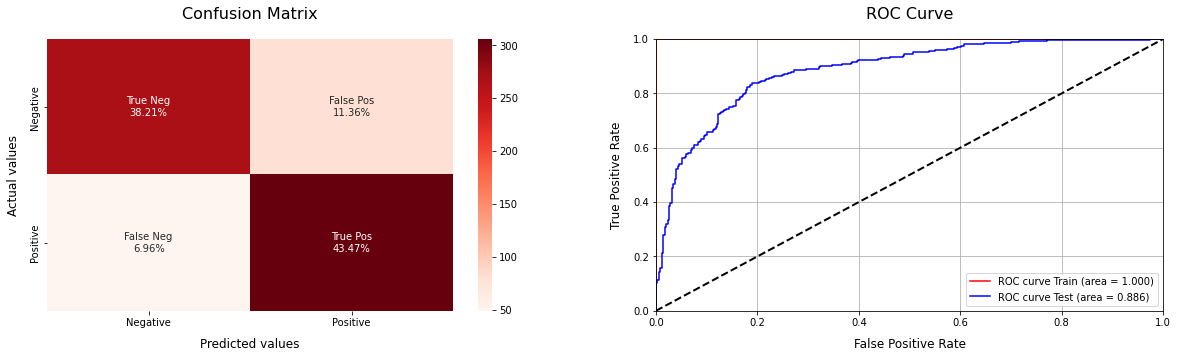

In [61]:
import warnings
warnings.filterwarnings('ignore')
parametros={
    'solver':['newton-cg', 'lbfgs', 'liblinear'],
    'fit_intercept':[True, False],
    'C':np.logspace(-3,3,7),
    'penalty':['none', 'l1', 'l2', 'elasticnet']
}
LR = GridSearchCV(LogisticRegression(),parametros, cv=None)
LR.fit(xv_train, y_train)
print('Los mejores parametros encontrados son:',LR.best_params_)
evaluate_model(LR, xv_train, y_train, xv_test, y_test)

### Arbol de desicion

Los mejores parametros encontrados son: {'criterion': 'entropy', 'max_depth': 150}


,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,0.997813,0.936389,0.966126,0.965885,0.933745,0.994444
Test set,0.665722,0.661972,0.663842,0.661932,0.323852,0.667985


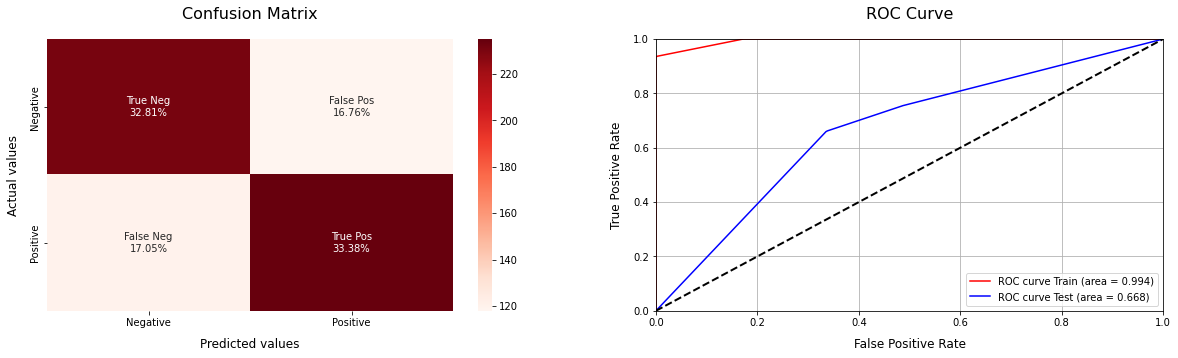

In [62]:
parametros = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}
DT = GridSearchCV(DecisionTreeClassifier(), parametros, cv=None)
DT.fit(xv_train, y_train)
print('Los mejores parametros encontrados son:',DT.best_params_)
evaluate_model(DT, xv_train, y_train, xv_test, y_test)

### Random Forest

#### Sin GridSearch

,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test set,0.795796,0.746479,0.770349,0.775568,0.552422,0.854401


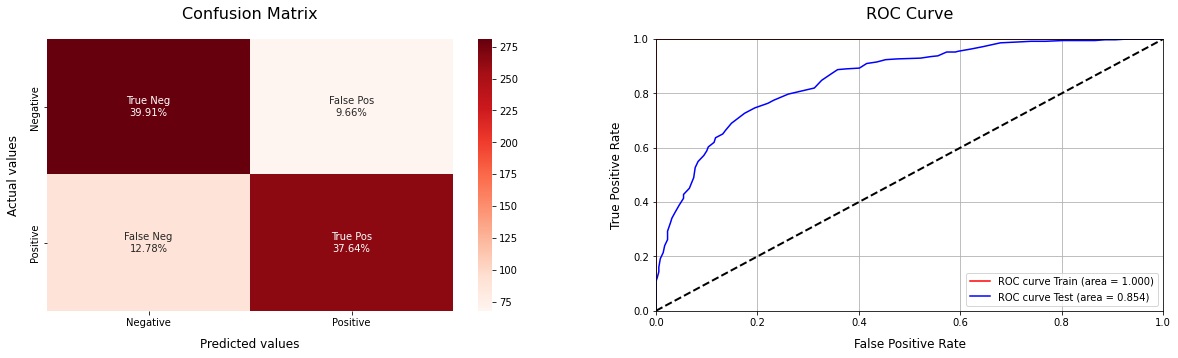

In [63]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
evaluate_model(RFC, xv_train, y_train, xv_test, y_test)

#### Con GridSearch

Los mejores parametros encontrados son: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,0.736410,0.982216,0.841735,0.808102,0.652097,0.953856
Test set,0.638623,0.940845,0.760820,0.701705,0.456808,0.843573


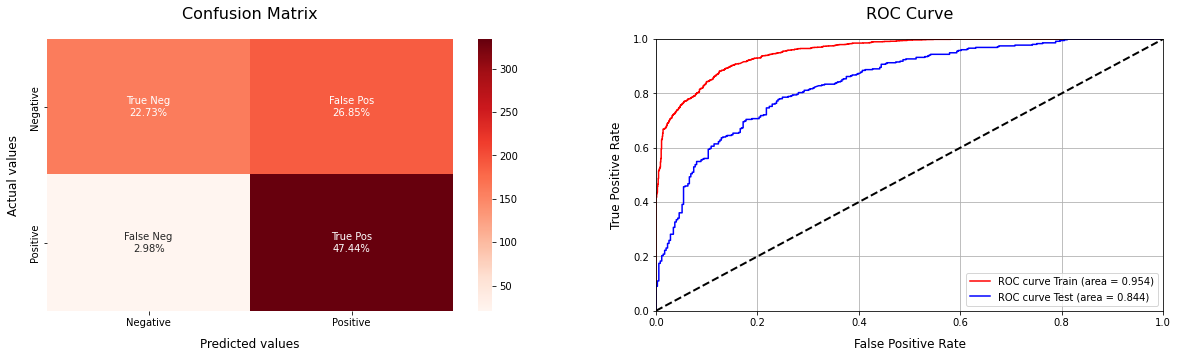

In [64]:
parametros = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
RF = GridSearchCV(RandomForestClassifier(), parametros, cv=None)
RF.fit(xv_train, y_train)
print('Los mejores parametros encontrados son:',RF.best_params_)
evaluate_model(RF, xv_train, y_train, xv_test, y_test)

### Bayes ingenuo

### Sin GridSearch

,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,0.931920,0.992476,0.961245,0.958422,0.918610,0.995758
Test set,0.708609,0.904225,0.794554,0.764205,0.549071,0.872796


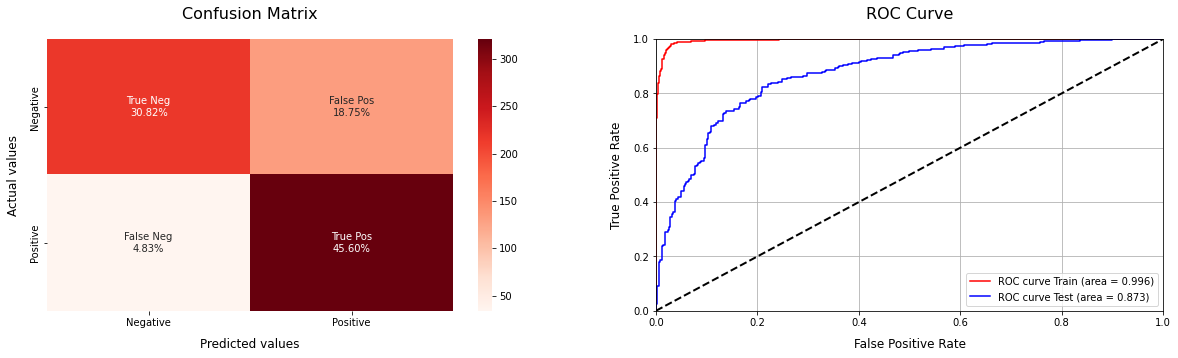

In [65]:
NB = MultinomialNB()
NB.fit(xv_train, y_train)
evaluate_model(NB, xv_train, y_train, xv_test, y_test)

Los mejores parametros encontrados son: {'alpha': 0.1, 'fit_prior': False}


,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,0.993193,0.997948,0.995565,0.995380,0.990757,0.999894
Test set,0.771208,0.845070,0.806452,0.795455,0.593322,0.871553


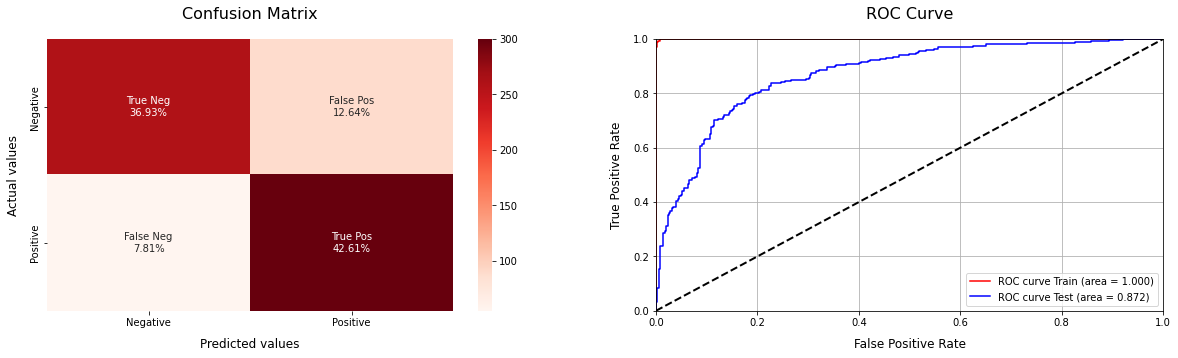

In [66]:
parametros = {'fit_prior': (True, False),
              'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
             }
NB = GridSearchCV(MultinomialNB(), parametros, cv=None)
NB.fit(xv_train, y_train)
print('Los mejores parametros encontrados son:',NB.best_params_)
evaluate_model(NB, xv_train, y_train, xv_test, y_test)

### Redes neuronales

,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
Test set,0.803922,0.808451,0.80618,0.803977,0.607917,0.884192


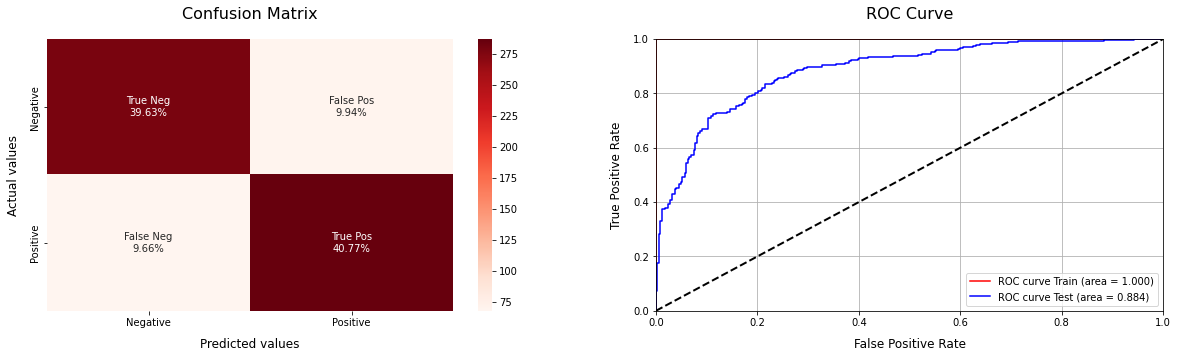

In [67]:
RN = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
RN.fit(xv_train, y_train)
evaluate_model(RN, xv_train, y_train, xv_test, y_test)

Los mejores parametros encontrados son: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,1.000000,1.000000,1.0,1.000000,1.00000,1.000000
Test set,0.796703,0.803324,0.8,0.794034,0.58773,0.858968


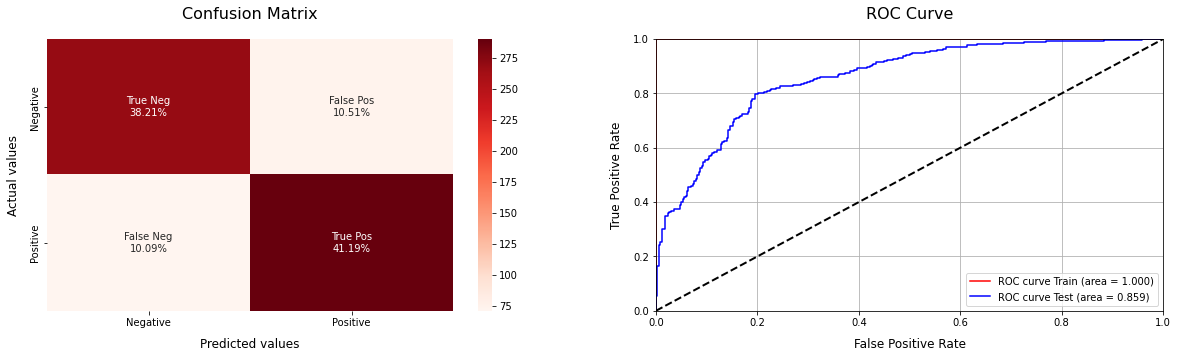

In [ ]:
parametros = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
RN = GridSearchCV(MLPClassifier(), parametros, cv=None)
RN.fit(xv_train, y_train)
print('Los mejores parametros encontrados son:',RN.best_params_)
evaluate_model(RN, xv_train, y_train, xv_test, y_test)